In [1]:
import mglearn

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import pandas as pd
import numpy as np

In [13]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [14]:
boston = load_boston()
print(type(boston.data), type(boston.target))

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [16]:
## 입력과 출력 - X, y
X = df_boston.loc[:,'CRIM':'LSTAT']
y = df_boston['price']

print(X.shape, y.shape)
print(df_boston['CRIM'].min(), df_boston['CRIM'].max())
print(df_boston['NOX'].min(), df_boston['NOX'].max())
print(df_boston['INDUS'].min(), df_boston['INDUS'].max())

(506, 13) (506,)
0.00632 88.9762
0.385 0.871
0.46 27.74


In [17]:
### 데이터 정규화 - 데이터의 값의 범위 0~... -> 0~1
nor_X = MinMaxScaler().fit_transform(X)

print(type(nor_X))
print( np.min(nor_X[0]), np.max(nor_X[0]))
print( np.min(nor_X[1]), np.max(nor_X[1]))

<class 'numpy.ndarray'>
0.0 0.9999999999999999
0.0 0.9999999999999999


In [20]:
print(X.shape, y.shape)

ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)

print(ex_X.shape, y.shape)

(506, 13) (506,)
(506, 104) (506,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(ex_X,y, random_state=42)

ex_model = LinearRegression().fit(X_train, y_train)

print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351677


In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso_m = Lasso(alpha = 0.01).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.886503377794609 0.80359225764207


C:\Users\hingu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364156638, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [42]:
from sklearn.linear_model import Ridge

In [31]:
ridge_m = Ridge(alpha = 0.01).fit(X_train, y_train)
print(ridge_m.score(X_train, y_train), ridge_m.score(X_test, y_test))

0.9357645261988805 0.8144760713008701


In [35]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0))

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26
사용한 특성의 수 :  3


In [34]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
사용한 특성의 수 :  102


C:\Users\hingu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471423, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [36]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

학습용 데이터 세트 점수 :  0.8864717420585478
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수 :  34


In [37]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

학습용 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234086
사용한 특성의 수 :  12


In [38]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

학습용 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


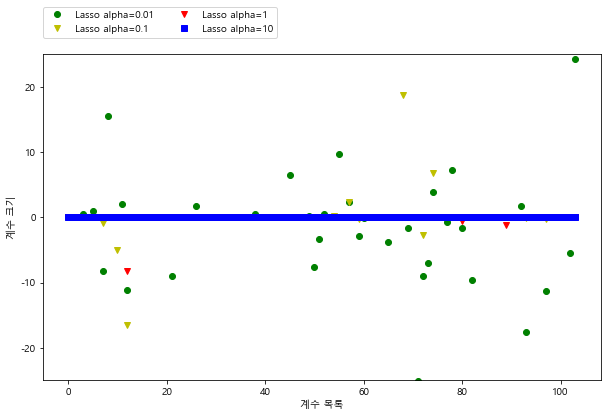

In [40]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
#plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'rv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

In [44]:
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.79
사용한 특성의 수 :  104


In [45]:
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge0001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge0001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge0001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [46]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [47]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

학습용 데이터 점수 : 0.92
테스트 데이터 점수 : 0.82
사용한 특성의 수 :  104


In [48]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge1.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge1.coef_ != 0))

학습용 데이터 점수 : 0.87
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [49]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

학습용 데이터 점수 : 0.77
테스트 데이터 점수 : 0.73
사용한 특성의 수 :  104


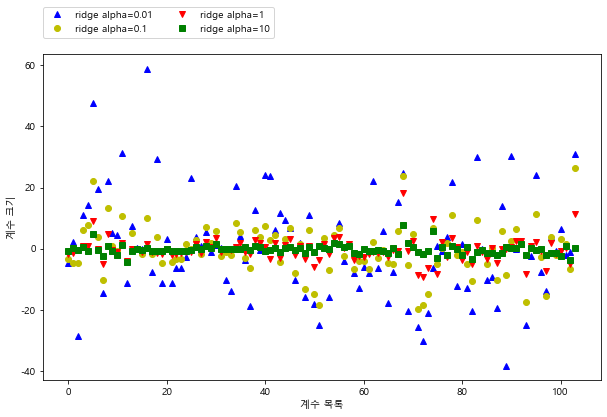

In [58]:
plt.figure(figsize=(10,6))
#plt.plot(ridge00001.coef_, "r^", label="ridge alpha=0.0001")
#plt.plot(ridge0001.coef_, "g^", label="ridge alpha=0.001")
plt.plot(ridge001.coef_, "b^", label="ridge alpha=0.01")
plt.plot(ridge01.coef_, 'yo', label="ridge alpha=0.1")
plt.plot(ridge1.coef_, 'rv', label="ridge alpha=1")
plt.plot(ridge10.coef_, "gs", label="ridge alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()